In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt
import concurrent.futures
import glob
from windrose import WindroseAxes


sys.path.append(os.path.join(os.getcwd(), 'EC'))
sys.path.append(os.path.join(os.getcwd(), 'plotting'))
sys.path.append(os.path.join(os.getcwd(), 'SPC'))

import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR
import Func_MRFD
import Funcs_plots
import normalize

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)
importlib.reload(Func_MRFD)
importlib.reload(Funcs_plots)
importlib.reload(normalize)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *
from Funcs_plots import *
from normalize import *

In [3]:
# folder = '/home/engbers/Documents/PhD/EC_data_convert/converted/'
# sensor = 'SFC'
# start = '2024-01-01 00:00'
# end = '2025-03-01 00:00'
# output_folder = '/home/engbers/Documents/PhD/EC_data_convert/SFC/202404'

# # GET SENSOR INFO
# plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)
# slowdata = read_data(folder, 'slow', sensor, start, end, plot_data=False)

# file_numbers_array = [i for i in range(502, 498, 6)]

# def process_batch(file_number):
#     file_numbers = np.arange(file_number, file_number + 8).astype(int).astype(str)
#     print(f"Processing files: {file_numbers}")
    
#     fastdata_SFC = read_data(folder, 'fast', sensor, start, end, file_numbers=file_numbers)
    
#     despiked_fastdata = despike_fast_MAD(
#         fastdata_SFC, slowdata, plim, sensor,
#         calibration_coefficients=calibration_coefficients,
#         plot_despike=False  # Set False if running parallel headless
#     )
    
#     # save_despiked_data(fastdata_SFC, despiked_fastdata, output_folder, sensor)
#     # return f"Finished {file_number}"

# # Run in parallel
# with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
#     results = list(tqdm(executor.map(process_batch, file_numbers_array), total=len(file_numbers_array)))
# print(results)

In [2]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'

sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m_DR'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor)


Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/F

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
TOA5_STN1OneMin_403_2023_12_31_1506.dat
TOA5_STN1OneMin_404_2024_01_01_1506.dat
TOA5_STN1OneMin_405_2024_01_02_1506.dat
TOA5_STN1OneMin_406_2024_01_03_1506.dat
TOA5_STN1OneMin_407_2024_01_04_1506.dat
TOA5_STN1OneMin_408_2024_01_05_1506.dat
TOA5_STN1OneMin_409_2024_01_06_1506.dat
TOA5_STN1OneMin_410_2024_01_07_1506.dat
TOA5_STN1OneMin_411_2024_01_08_1506.dat
TOA5_STN1OneMin_412_2024_01_09_1506.dat
TOA5_STN1OneMin_413_2024_01_10_1506.dat
TOA5_STN1OneMin_414_2024_01_11_1506.dat
TOA5_STN1OneMin_415_2024_01_12_1506.dat
TOA5_STN1OneMin_416_2024_01_13_1506.dat
TOA5_STN1OneMin_417_2024_01_14_1506.dat
TOA5_STN1OneMin_418_2024_01_15_1506.dat
TOA5_STN1OneMin_419_2024_01_16_1506.dat
TOA5_STN1OneMin_420_2024_01_17_1506.dat
Reading data from /home/engbers/Documents/PhD/EC_data_convert/convert

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:287: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'./plots/{sensor}_{start}_slowdata.png', bbox_inches='tight')


(<Figure size 1300x1400 with 7 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed[ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Flowcapt [g/m2/s]'>], dtype=object))

/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


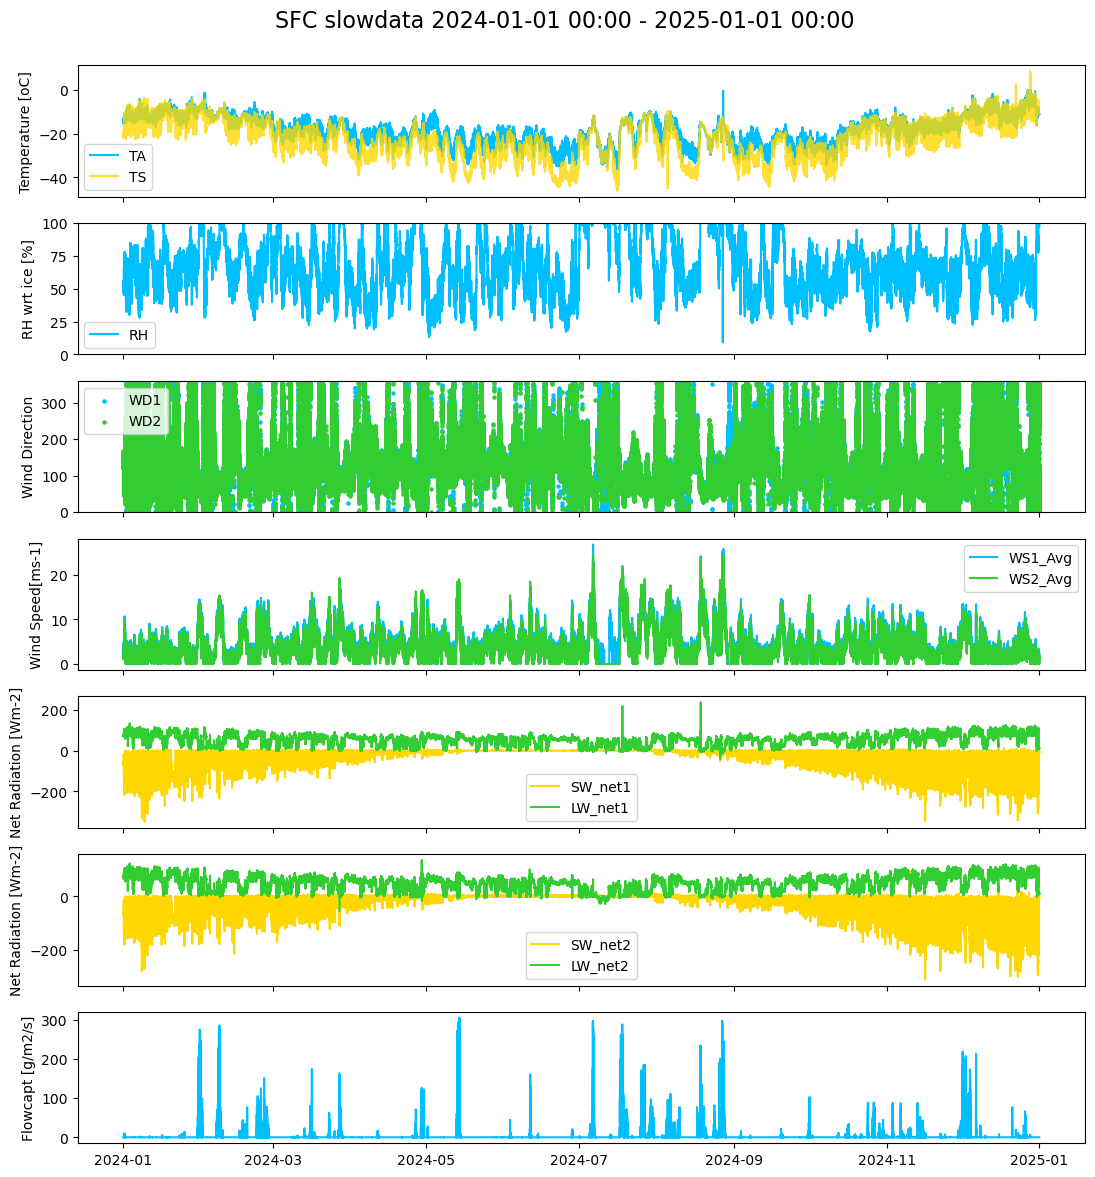

In [3]:
"""READ AND CLEAN SLOWDATA"""
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-01-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)
plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)




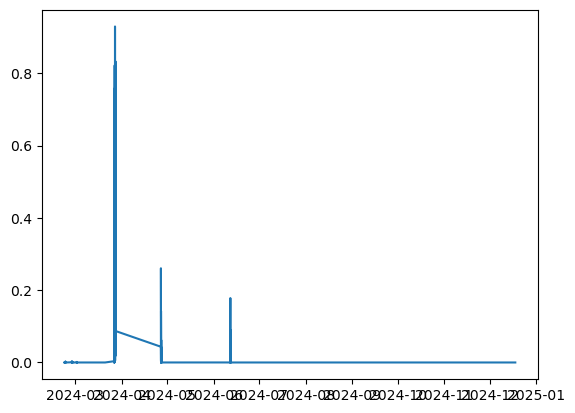

In [20]:
"""CHECK SPC SCRIPTS"""
SPC_folder = '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed'
SPC_filenames = []
for file in glob.glob(os.path.join(SPC_folder, '*.txt')):
    SPC_filenames.append(file)

SPC=getNormalizedData(SPC_filenames[0:20], slowdata_cleaned)
SPC
SPC_raw=getRawData(SPC_filenames[0:20])
plt.plot(SPC['Corrected Mass Flux(kg/m^2/s)'])


In [ ]:
column_sums_SPC = []
column_sums_SPC_raw = []

# Calculate the sum of all values for each column from index 1 to -2 for SPC
for column in SPC.columns[1:-1]:
    column_sums_SPC.append(SPC[column].sum())

# Calculate the sum of all values for each column from index 1 to -2 for SPC_raw
for column in SPC_raw.columns[1:-1]:
    column_sums_SPC_raw.append(SPC_raw[column].sum())

# Create the combined histogram
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(column_sums_SPC) + 1), column_sums_SPC, color='blue', edgecolor='black', alpha=0.7, label='SPC')
plt.bar(range(1, len(column_sums_SPC_raw) + 1), column_sums_SPC_raw, color='orange', edgecolor='black', alpha=0.5, label='SPC_raw')
plt.title("Combined Histogram of SPC and SPC_raw Columns")
plt.xlabel("Column Index (1 to -2)")
plt.ylabel("Sum of Counts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, len(column_sums_SPC) + 1), SPC.columns[1:-1], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
SPC_raw

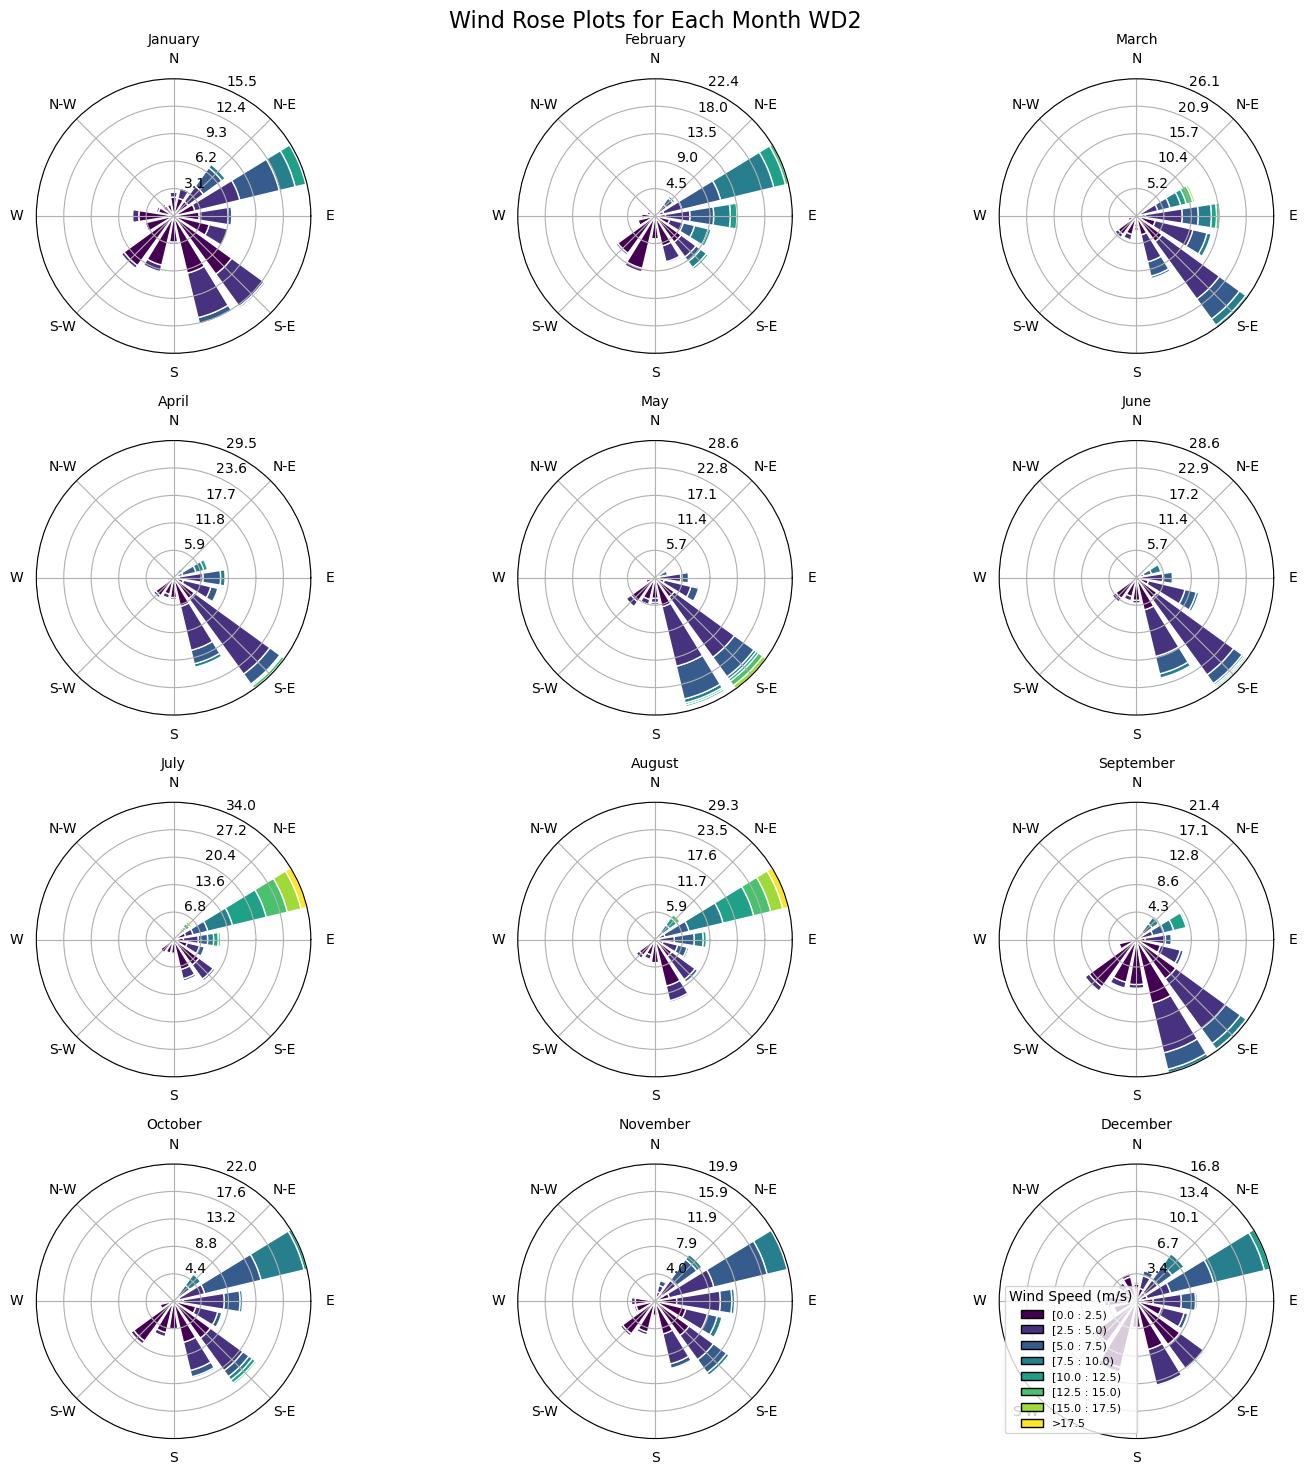

In [ ]:
# Add a new column for the month name
slowdata_cleaned['Month_Name'] = slowdata_cleaned.index.month_name()
# Create a new column for the month
slowdata_cleaned['Month'] = slowdata_cleaned.index.month
# Initialize the figure
fig = plt.figure(figsize=(15, 15))
# Define a consistent color map for wind speed
cmap = plt.cm.viridis
# Loop through each month and create a wind rose
for month in range(1, 13):
    ax = fig.add_subplot(4, 3, month, projection='windrose')
    monthly_data = slowdata_cleaned[slowdata_cleaned['Month'] == month]
    bars = ax.bar(
        monthly_data['WD2'], 
        monthly_data['WS2_Avg'], 
        normed=True, 
        opening=0.8, 
        edgecolor='white', 
        cmap=cmap, 
        bins=np.arange(0, 20, 2.5)  # Set bins with increments of 3 m/s
    )
    ax.set_title(f"{slowdata_cleaned['Month_Name'][slowdata_cleaned['Month'] == month].iloc[0]}", fontsize=10)

# Add legends directly to each subplot
ax.legend(
    loc='lower left', 
    fontsize=8, 
    title="Wind Speed (m/s)"
)
plt.suptitle('Wind Rose Plots for Each Month WD2', fontsize=16, y=0.98)
# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('./plots/WD2_SFC_slowdata_windrose_year.png', bbox_inches='tight', dpi=300)
plt.show()

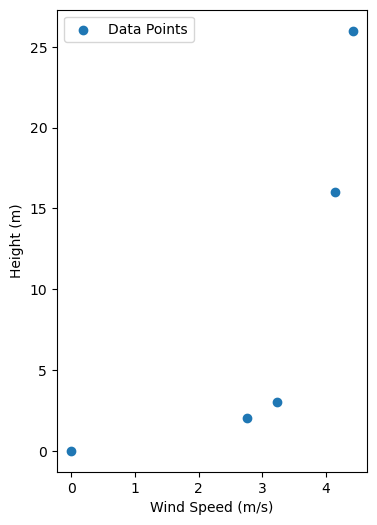

In [ ]:
from scipy.optimize import curve_fit

start = '2024-08-10 17:00'
end = '2024-08-15 18:00'

check_log_profile(slowdata, fluxes_16m, fluxes_26m, start, end, log=False)


180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10
600.0
18
600.0
18
180.0
10


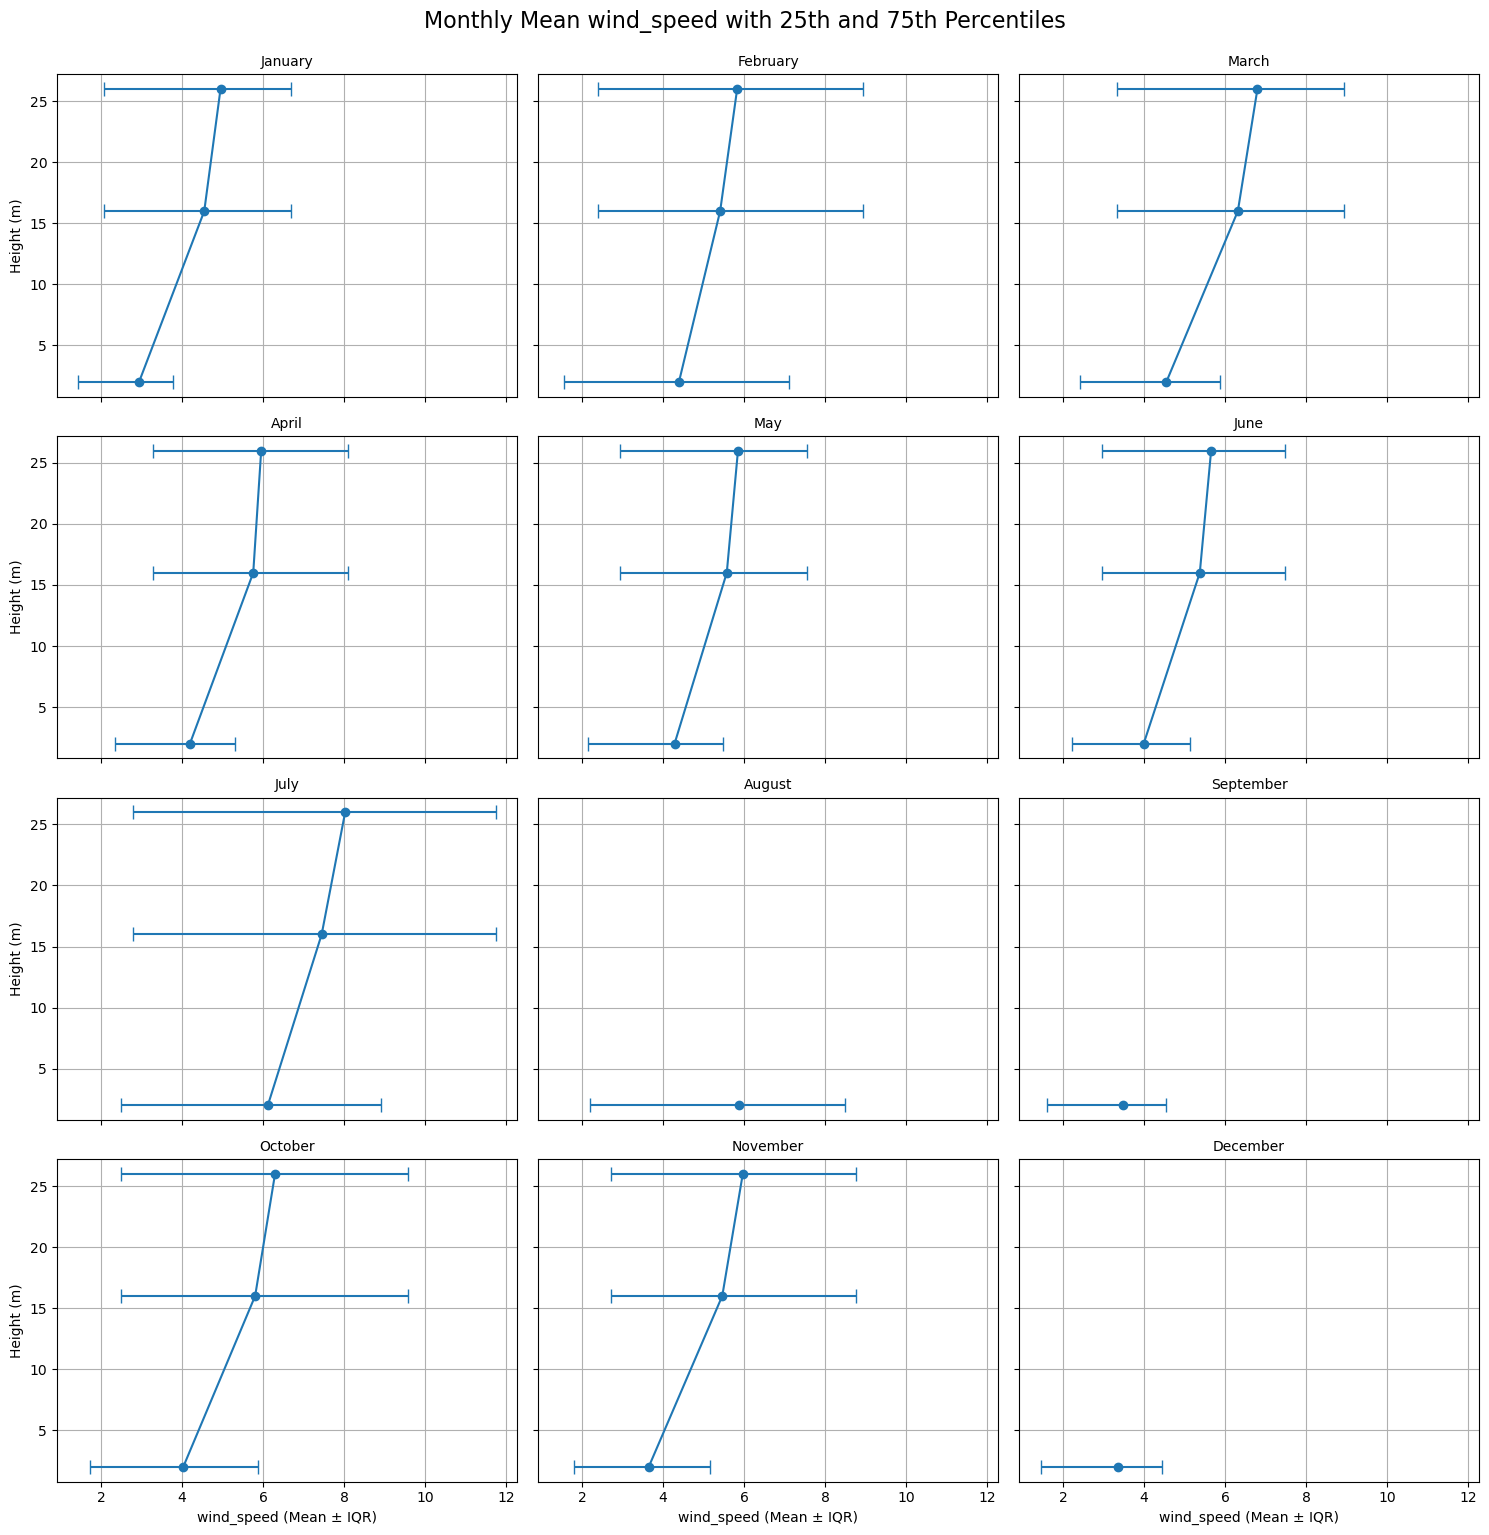

In [148]:
def plot_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights, variable):
    """
    Plots the monthly mean H with 25th and 75th percentiles for different heights.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        resample_func (function): Function to resample data with a threshold.
    """
    # Add a 'Month' column to group data by month
    fluxes_SFC['Month'] = fluxes_SFC.index.month
    fluxes_16m['Month'] = fluxes_16m.index.month
    fluxes_26m['Month'] = fluxes_26m.index.month

    # Add a 'Month_Name' column to include the name of the month
    fluxes_SFC['Month_Name'] = fluxes_SFC.index.month_name()
    fluxes_16m['Month_Name'] = fluxes_16m.index.month_name()
    fluxes_26m['Month_Name'] = fluxes_26m.index.month_name()

    # Initialize the figure
    fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each month and create subplots
    for month in range(1, 13):
        ax = axes[month - 1]
        
        # Filter data for the current month
        sfc_month = fluxes_SFC[fluxes_SFC['Month'] == month][variable]
        m16_month = fluxes_16m[fluxes_16m['Month'] == month][variable]
        m26_month = fluxes_26m[fluxes_26m['Month'] == month][variable]
        
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_month, '1ME', True, '30min').mean() if not sfc_month.empty else np.nan, 
            resample_with_threshold(m16_month, '1ME', True, '3h', 70).mean() if not m16_month.empty else np.nan, 
            resample_with_threshold(m26_month, '1ME', True, '3h', 70).mean() if not m26_month.empty else np.nan
        ]
        percentiles_25 = [sfc_month.quantile(0.25), m16_month.quantile(0.25), m16_month.quantile(0.25)]
        percentiles_75 = [sfc_month.quantile(0.75), m26_month.quantile(0.75), m26_month.quantile(0.75)]
        
        # Plot the means with whiskers
        ax.errorbar(
            means, heights, 
            xerr=[np.array(means) - np.array(percentiles_25), np.array(percentiles_75) - np.array(means)], 
            fmt='o-', capsize=5, label='H'
        )
        
        # Set titles and labels
        if not fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].empty:
            ax.set_title(f"{fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].iloc[0]}", fontsize=10)
        else:
            ax.set_title(f"Month {month}", fontsize=10)
        if month % 3 == 1:  # First column
            ax.set_ylabel("Height (m)")
        if month > 9:  # Last row
            ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"Monthly Mean {variable} with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights=[2, 16, 26], variable='wind_speed')

In [ ]:
def plot_bi_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights, variable):
    """
    Plots the bi-monthly mean H with 25th and 75th percentiles for different heights.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variable (str): The variable to plot.
    """
    # Add 'Month' and 'Day' columns to group data
    fluxes_SFC['Month'] = fluxes_SFC.index.month
    fluxes_SFC['Day'] = fluxes_SFC.index.day
    fluxes_16m['Month'] = fluxes_16m.index.month
    fluxes_16m['Day'] = fluxes_16m.index.day
    fluxes_26m['Month'] = fluxes_26m.index.month
    fluxes_26m['Day'] = fluxes_26m.index.day

    # Add 'Month_Name' column for labeling
    fluxes_SFC['Month_Name'] = fluxes_SFC.index.month_name()
    fluxes_16m['Month_Name'] = fluxes_16m.index.month_name()
    fluxes_26m['Month_Name'] = fluxes_26m.index.month_name()

    # Initialize the figure
    fig, axes = plt.subplots(6, 4, figsize=(20, 20), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each month and create subplots for the first and second halves
    for month in range(1, 13):
        for part in [1, 2]:  # 1 for first half, 2 for second half
            ax = axes[(month - 1) * 2 + (part - 1)]

            # Filter data for the current month and part
            if part == 1:
                sfc_part = fluxes_SFC[(fluxes_SFC['Month'] == month) & (fluxes_SFC['Day'] <= 15)][variable]
                m16_part = fluxes_16m[(fluxes_16m['Month'] == month) & (fluxes_16m['Day'] <= 15)][variable]
                m26_part = fluxes_26m[(fluxes_26m['Month'] == month) & (fluxes_26m['Day'] <= 15)][variable]
                title_suffix = " (1st Half)"
            else:
                sfc_part = fluxes_SFC[(fluxes_SFC['Month'] == month) & (fluxes_SFC['Day'] > 15)][variable]
                m16_part = fluxes_16m[(fluxes_16m['Month'] == month) & (fluxes_16m['Day'] > 15)][variable]
                m26_part = fluxes_26m[(fluxes_26m['Month'] == month) & (fluxes_26m['Day'] > 15)][variable]
                title_suffix = " (2nd Half)"

            # Calculate mean, 25th, and 75th percentiles
            means = [
                resample_with_threshold(sfc_part, '1ME', True, '30min').mean() if not sfc_part.empty else np.nan,
                resample_with_threshold(m16_part, '1ME', True, '3h', 70).mean() if not m16_part.empty else np.nan,
                resample_with_threshold(m26_part, '1ME', True, '3h', 70).mean() if not m26_part.empty else np.nan
            ]
            percentiles_25 = [sfc_part.quantile(0.25), m16_part.quantile(0.25), m26_part.quantile(0.25)]
            percentiles_75 = [sfc_part.quantile(0.75), m16_part.quantile(0.75), m26_part.quantile(0.75)]

            # Plot the means with whiskers
            ax.errorbar(
                means, heights,
                xerr=[np.array(means) - np.array(percentiles_25), np.array(percentiles_75) - np.array(means)],
                fmt='o-', capsize=5, label='H'
            )

            # Set titles and labels
            if not fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].empty:
                ax.set_title(f"{fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].iloc[0]}{title_suffix}", fontsize=10)
            else:
                ax.set_title(f"Month {month}{title_suffix}", fontsize=10)
            if (month - 1) * 2 + (part - 1) % 4 == 0:  # First column
                ax.set_ylabel("Height (m)")
            if (month - 1) * 2 + (part - 1) >= 20:  # Last row
                ax.set_xlabel(f"{variable} (Mean ± IQR)")
            ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"Bi-Monthly Mean {variable} with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_bi_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights=[2, 16, 26], variable='wind_speed')

180.0
60
600.0
18
600.0
18


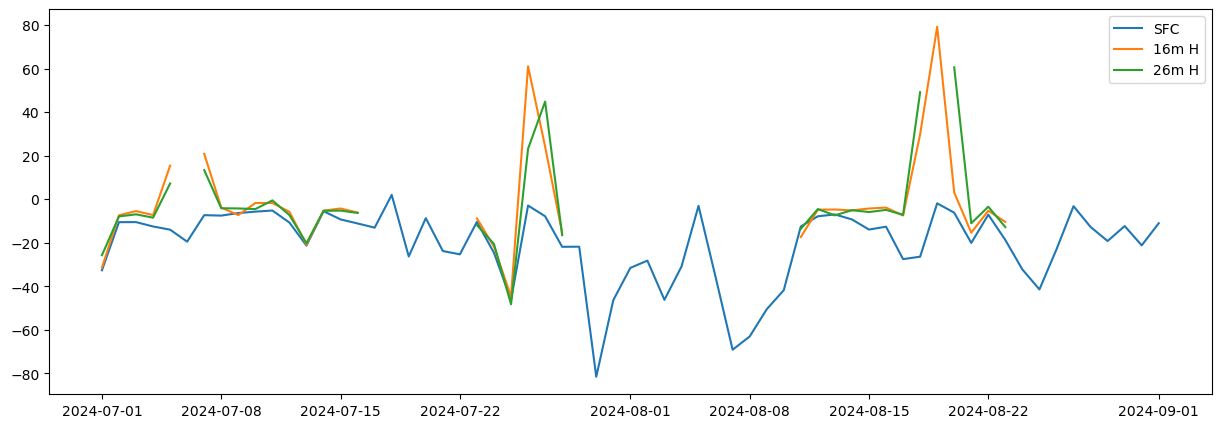

In [ ]:
start = '2024-07-01 00:00'
end = '2024-09-01 00:00'
plt.figure(figsize=(15, 5))
plt.plot(resample_with_threshold(fluxes_SFC['H'], '1D', True, '3h', 80)[start:end], label='SFC')
plt.plot(resample_with_threshold(fluxes_16m['H'], '1D', True, '3h', 80)[start:end], label='16m H')
plt.plot(resample_with_threshold(fluxes_26m['H'], '1D', True, '3h', 80)[start:end], label='26m H')
plt.legend()


(<Figure size 1300x1800 with 9 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>,
        <Axes: ylabel='Wind Speed [ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>, <Axes: ylabel='HS_Cor [m]'>,
        <Axes: ylabel='Mass flux [g/m2/s]'>, <Axes: ylabel='H [Wm-2]'>,
        <Axes: ylabel='LE [Wm-2]'>], dtype=object))

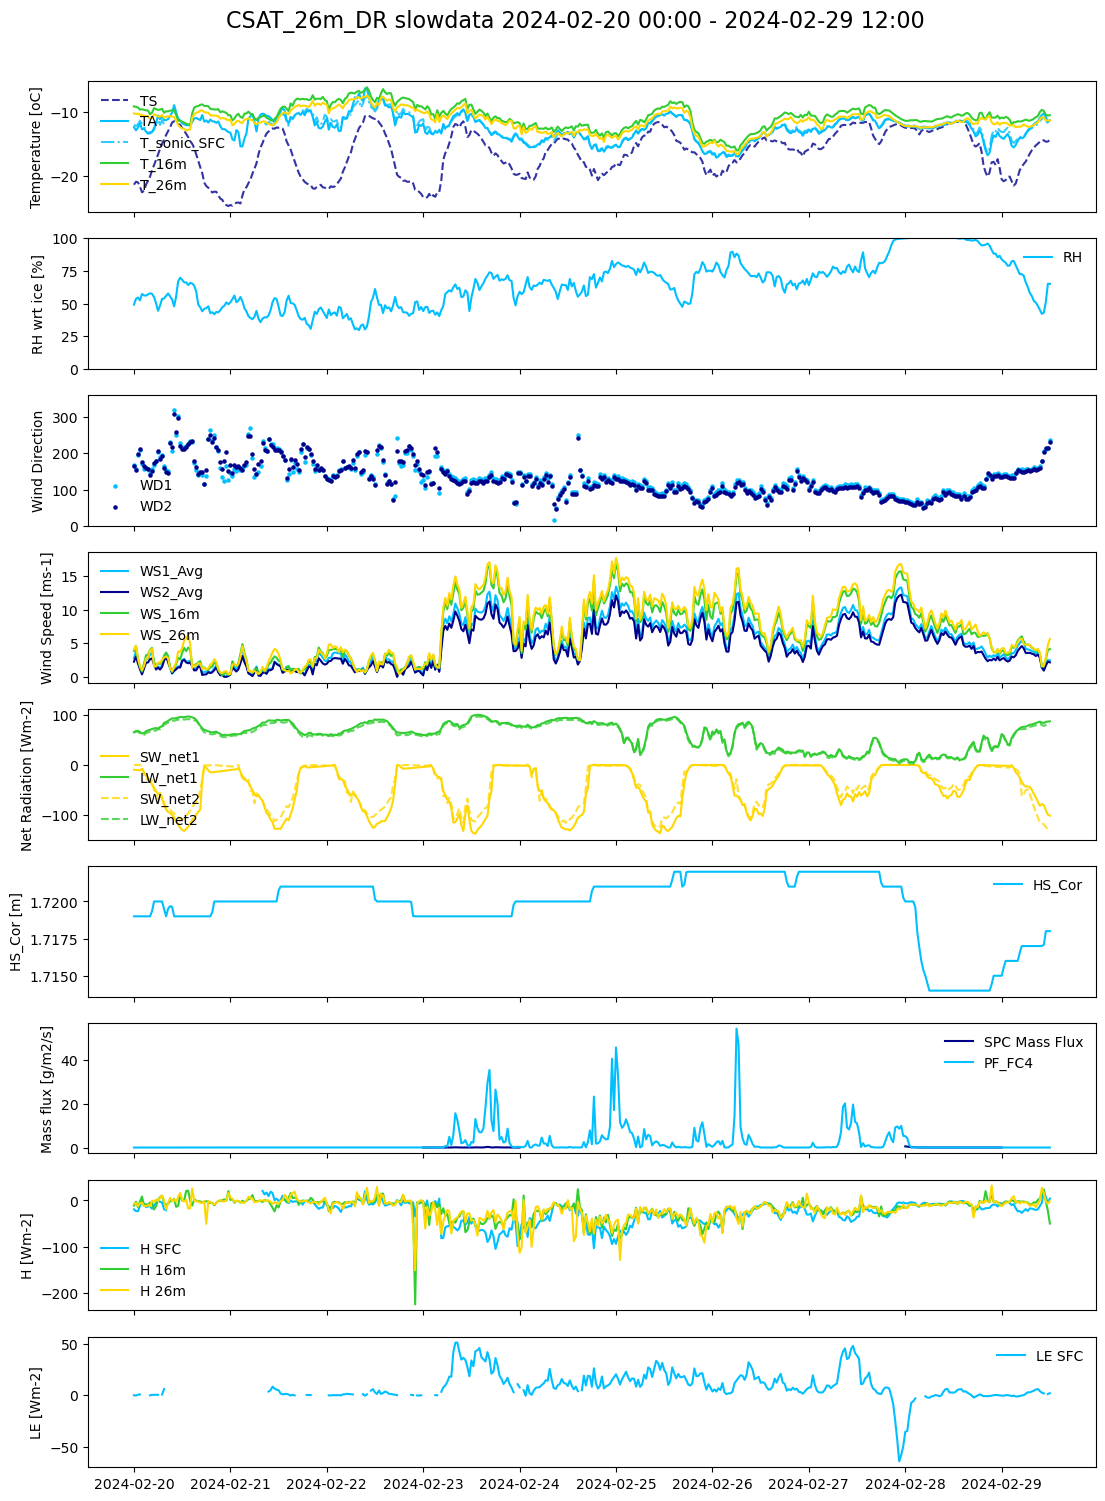

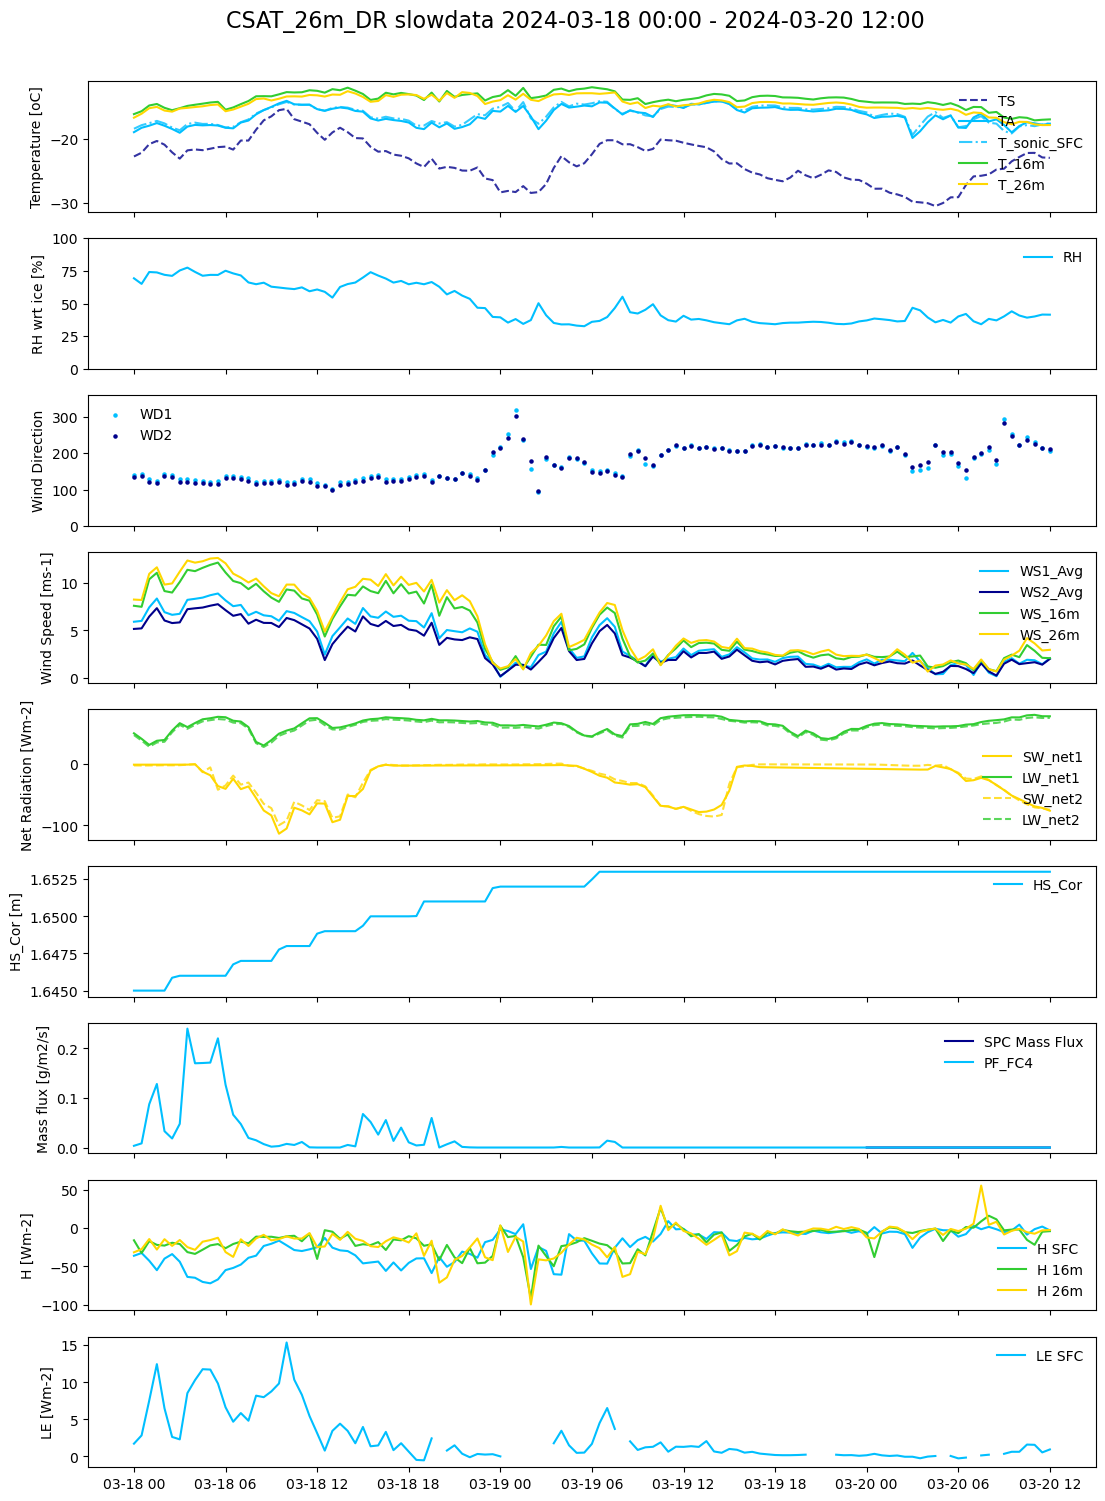

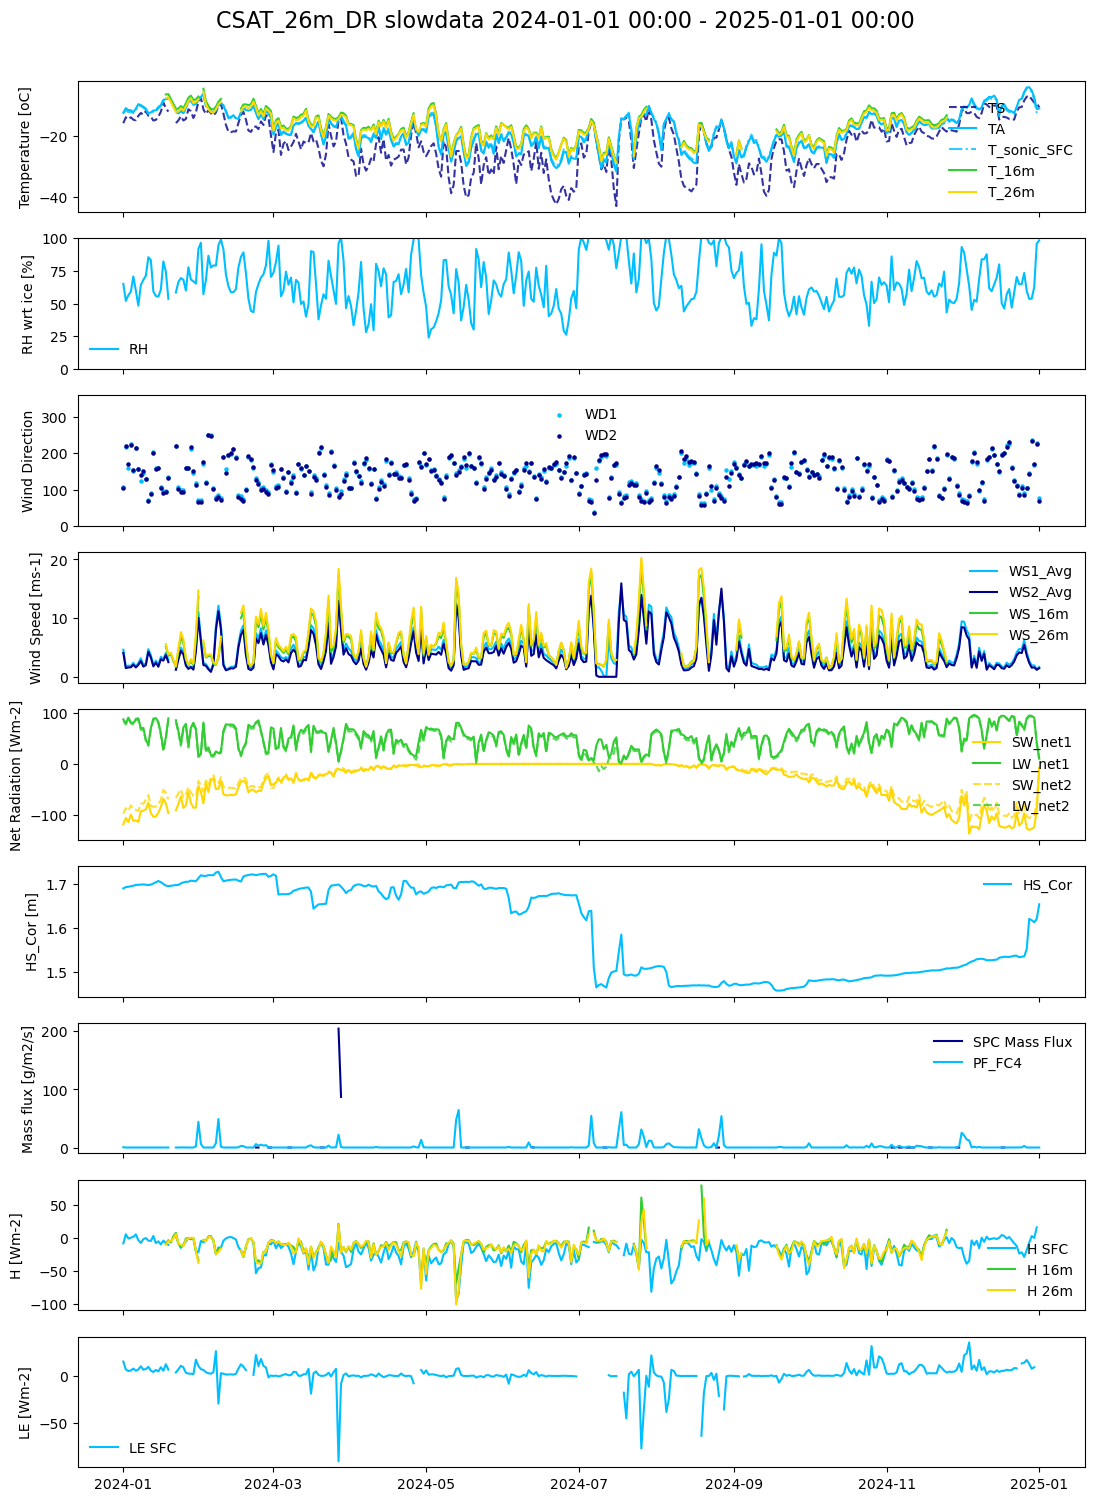

In [ ]:
"""PLOT SLOWDATA AND FLUXES"""
start='2024-02-20 00:00'
end='2024-02-29 12:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-03-18 00:00'
end='2024-03-20 12:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-01-01 00:00'
end='2025-01-01 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='1D', interpolate=True)

                     Sensor  Time(Julian)  Total Second  Temperature(C)  36  \
Time(UTC)                                                                     
2024-03-02 00:00:01       4   62,00001157    1709337601          -21.77   0   
2024-03-02 00:00:02       4   62,00002315    1709337602          -21.77   0   
2024-03-02 00:00:03       4   62,00003472    1709337603          -21.77   0   
2024-03-02 00:00:04       4   62,00004630    1709337604          -21.77   0   
2024-03-02 00:00:05       4   62,00005787    1709337605          -21.77   0   
...                     ...           ...           ...             ...  ..   
2024-03-07 23:52:55       4   67,99508102    1709855575          -21.80   0   
2024-03-07 23:52:56       4   67,99509259    1709855576          -21.80   0   
2024-03-07 23:52:57       4   67,99510417    1709855577          -21.80   0   
2024-03-07 23:52:58       4   67,99511574    1709855578          -21.80   0   
2024-03-07 23:52:59       4   67,99512731    1709855

Sensor  36  46  53  60  67  74  81  88  95  ...  428  \
Time(UTC)                                                        ...        
2024-02-23 00:00:01       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-02-23 00:00:02       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-02-23 00:00:03       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-02-23 00:00:04       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-02-23 00:00:05       4   0   0   0   0   0   0   0   0   0  ...    0   
...                     ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2024-12-17 23:59:56       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-12-17 23:59:57       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-12-17 23:59:58       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-12-17 23:59:59       4   0   0   0   0   0   0   0   0   0  ...    0   
2024-12-18 00:00:00       4   0   0   0   0   0   0   0   0   0  ...    0   

                     435  442  449  456  464  471  478  490  \
Time(UTC)                                                     
2024-02-23 00:00:01    0    0    0    0    0    0    0    0   
2024-02-23 00:00:02    0    0    0    0    0    0    0    0   
2024-02-23 00:00:03    0    0    0    0    0    0    0    0   
2024-02-23 00:00:04    0    0    0    0    0    0    0    0   
2024-02-23 00:00:05    0    0    0    0    0    0    0    0   
...                  ...  ...  ...  ...  ...  ...  ...  ...   
2024-12-17 23:59:56    0    0    0    0    0    0    0    0   
2024-12-17 23:59:57    0    0    0    0    0    0    0    0   
2024-12-17 23:59:58    0    0    0    0    0    0    0    0   
2024-12-17 23:59:59    0    0    0    0    0    0    0    0   
2024-12-18 00:00:00    0    0    0    0    0    0    0    0   

                     Corrected Mass Flux(kg/m^2/s)  
Time(UTC)                                           
2024-02-23 00:00:01                            0.0  
2024-02-23 00:00:02                            0.0  
2024-02-23 00:00:03                            0.0  
2024-02-23 00:00:04                            0.0  
2024-02-23 00:00:05                            0.0  
...                                            ...  
2024-12-17 23:59:56                            0.0  
2024-12-17 23:59:57                            0.0  
2024-12-17 23:59:58                            0.0  
2024-12-17 23:59:59                            0.0  
2024-12-18 00:00:00                            0.0  

[1480029 rows x 66 columns]

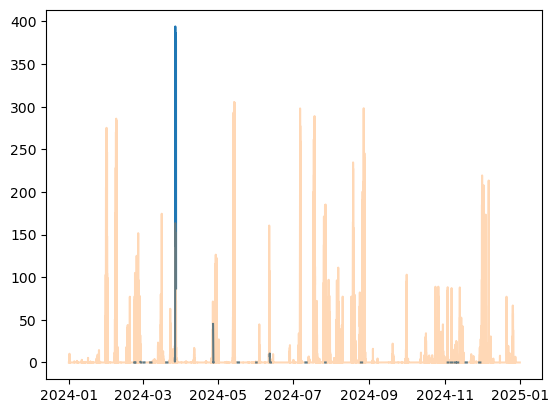

In [ ]:
plt.plot(SPC['Corrected Mass Flux(kg/m^2/s)']['2024-02-01':'2024-12-01'].resample('30min').mean()*1000)
plt.plot(slowdata_cleaned['PF_FC4'], alpha=0.3)

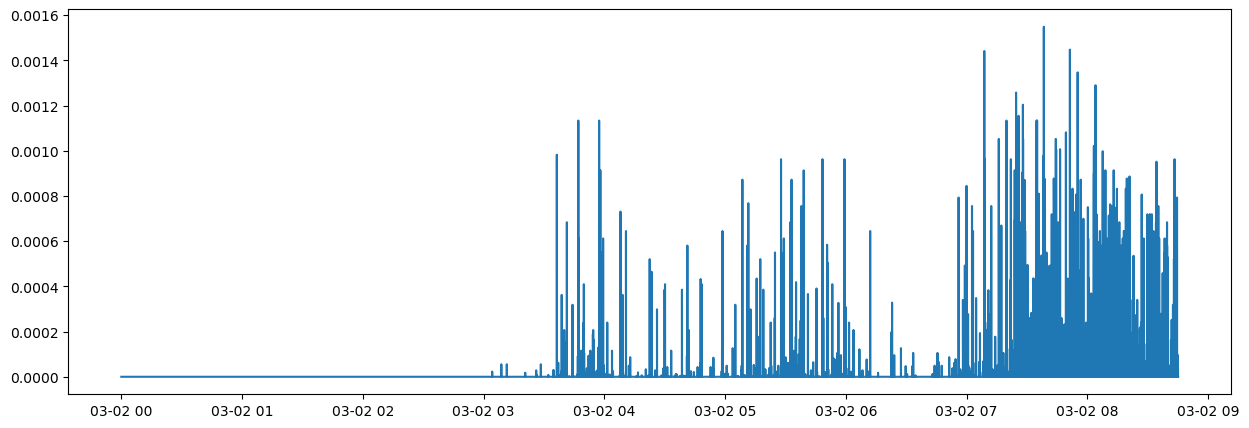

In [235]:
plt.figure(figsize=(15, 5))
plt.plot(SPC['Corrected Mass Flux(kg/m^2/s)']['2024-03-02':'2024-03-03'])


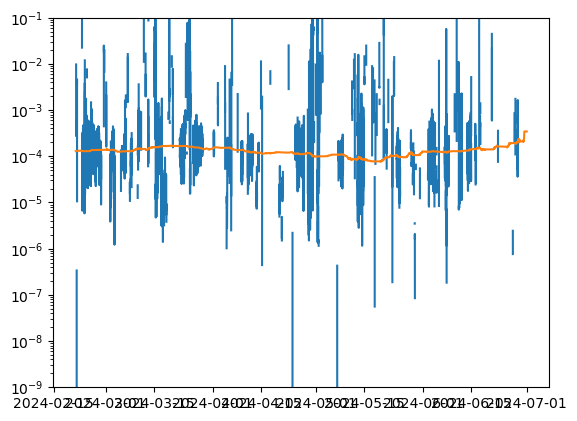

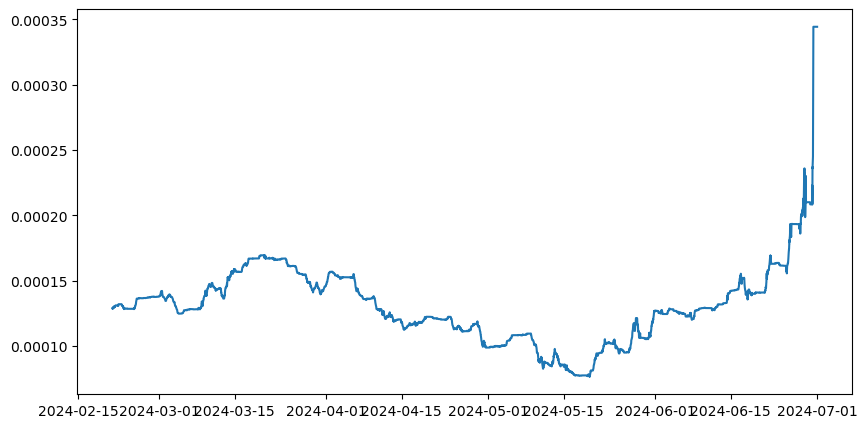

In [25]:
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc, 1.5)
plt.plot(z0)
plt.plot(z0rolling, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rolling, label='z0 rolling median')

In [ ]:
def rolling_median(data, column_name='HS_Cor', window='1D', max_value=None):
    """
    Function to despike snow height data using a one-day moving median filter.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing snow height data.
    - column_name (str): The name of the column containing snow height data.
    
    Returns:
    - pd.Series: The despiked snow height data.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Apply a one-day moving median filter
    median_filtered = data[column_name].rolling(window=window, center=True, min_periods=1).median()
    if max_value is not None:
        # Remove values above 2m
        median_filtered[median_filtered > max_value] = np.nan
        # Interpolate NaN values
        median_filtered = median_filtered.interpolate(method='linear', limit_direction='both')
    return median_filtered

In [21]:
import glob
folder='/home/engbers/Documents/PhD/EC_data_convert/SFC/202403/'
fastdata_list = []
units_metadata = {}

for file in sorted(glob.glob(folder + '*.dat')):
    temp_data = pd.read_csv(
        file,
        sep='\t',
        index_col=0,
        header=0,
        low_memory=False,
        na_values=['NaN'])
    temp_data.index = pd.to_datetime(temp_data.index, errors='coerce', format='mixed')
    dropped_row = temp_data.iloc[0]  # Extract the first row as metadata
    temp_data = temp_data.iloc[1:]  # Remove the first row from the data
    units_metadata[file] = dropped_row.to_dict()  # Store metadata in a dictionary
    
    # Convert all columns to numeric
    temp_data = temp_data.apply(pd.to_numeric, errors='coerce')
    
    fastdata_list.append(temp_data)  # Add the cleaned DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
fastdata = pd.concat(fastdata_list, ignore_index=False)

# Print the resulting DataFrame
print(fastdata)

                              Ux       Uy       Uz        Ts  LI_H2Om  LI_Pres
2024-03-01 00:00:00.000  0.48250 -2.40475  0.21900 -20.63008     35.9   1831.0
2024-03-01 00:00:00.100  0.24375 -2.55500  0.21825 -20.75847     36.6   1805.0
2024-03-01 00:00:00.200  0.18450 -2.35725  0.08550 -20.63641     36.4   1834.0
2024-03-01 00:00:00.300  0.45625 -2.39325  0.15050 -20.66336     36.1   1860.0
2024-03-01 00:00:00.400  0.66725 -2.33725  0.10750 -20.62689     36.1   1829.0
...                          ...      ...      ...       ...      ...      ...
2024-03-31 23:59:59.500  1.15900 -3.25900  0.14600 -22.77211     20.6   2065.0
2024-03-31 23:59:59.600  1.34400 -3.01650 -0.00975 -22.53528     20.7   2065.0
2024-03-31 23:59:59.700  1.12675 -2.96000 -0.05600 -22.51001     21.2   2089.0
2024-03-31 23:59:59.800  0.71775 -2.75525 -0.08900 -22.49261     20.9   2091.0
2024-03-31 23:59:59.900  1.11875 -2.67950 -0.04650 -22.50684     21.1   2065.0

[26784000 rows x 6 columns]


In [22]:
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(fastdata)


Double rotation for blocks of 0 days 00:30:00


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/1000000 [09:43<01:20, 1504.87it/s]


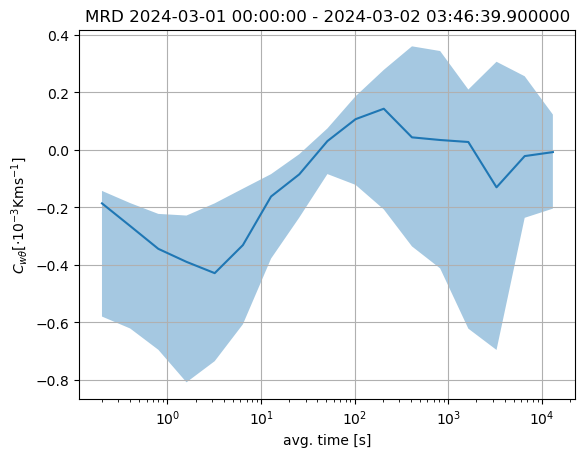

In [5]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[0:1000000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/999999 [08:24<01:10, 1739.83it/s]


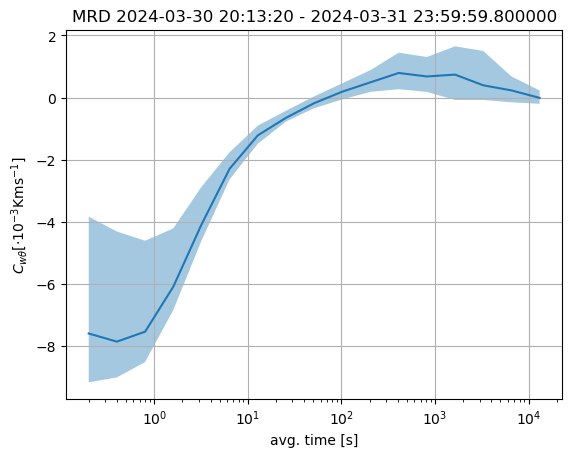

In [6]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[-1000000:-1], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 92%|█████████▏| 1376235/1500000 [20:17<01:49, 1130.60it/s]


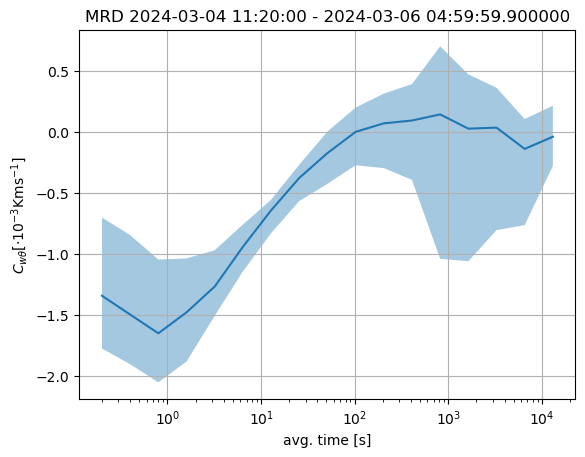

In [23]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[3000000:4500000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

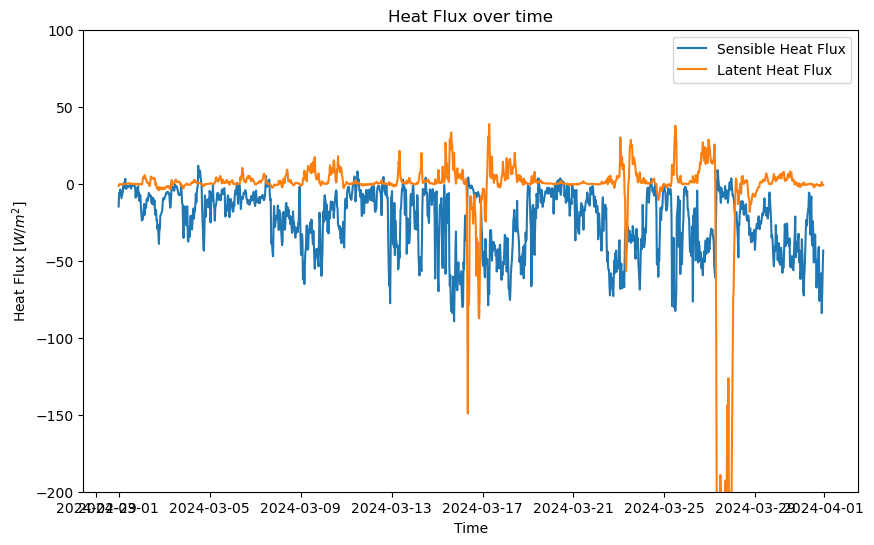

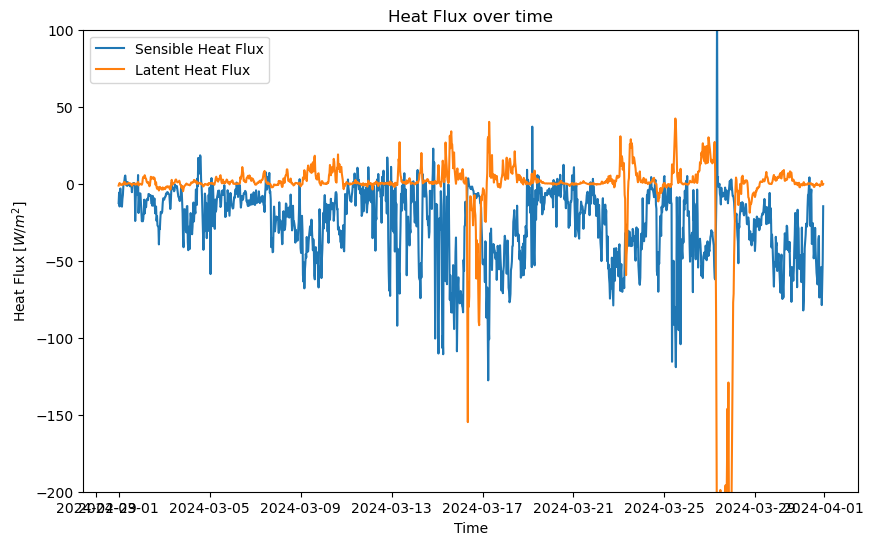

In [13]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '30s', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '10min', plot=True)